In [1]:
from __future__ import division

from faculty_hiring.misc.util import *
from faculty_hiring.misc.plotting import *  # Definitions for LABEL_SIZE, colors, etc.
from faculty_hiring.misc.productivity import *
from faculty_hiring.parse import faculty_parser, institution_parser
from faculty_hiring.parse import load
from faculty_hiring.misc.subfield import topic_descriptions, longer_topic_descriptions, num_topics 

import numpy as np
import scipy as sp
import palettable

from scipy.stats.stats import pearsonr, mannwhitneyu, ttest_ind
from scipy.stats import ttest_ind, ks_2samp, chi2_contingency, mannwhitneyu
from collections import Counter

In [2]:
faculty_file = '/Users/allisonmorgan/Documents/faculty_hiring/publication_data/current_data/faculty_cs_CURRENT.txt'
inst_file = '/Users/allisonmorgan/Documents/faculty_hiring/publication_data/current_data/inst_cs_CURRENT.txt'
figures_dir = '/Users/allisonmorgan/Code/src/github.com/samfway/faculty_hiring/notebooks-productivity/figures/'

# Path to prepped DBLP pickles
dblp_dir = '/Users/allisonmorgan/Documents/faculty_hiring/publication_data/profiles_DBLP_Nov16/'

In [3]:
inst = institution_parser.parse_institution_records(open(inst_file))
asst_faculty = load.load_assistant_profs(open(faculty_file), inst, ranking='pi')
load.load_all_publications(asst_faculty, dblp_dir)  # This takes a minute..

# Total Number of Publications

In [4]:
# Number of publications for all current assistant faculty of a university. Adjusted for inflation
ignore = ['All others', 'UNKNOWN', 'CUNY Graduate Center']
pubs_by_inst = {}
for (name, inst_data) in inst.items():
    if name in ignore:
        continue
    current_faculty = faculty_at_institution(name, asst_faculty)
    n_pubs = []
    for person in current_faculty:
        start = person.first_asst_job_year
        if person.__contains__('dblp_pubs'):
            contribution = 0
            for pub in person.dblp_pubs:
                if 'year' in pub and pub['year'] >= start and pub['year'] < 2012 and pub['pub_type'] in ['inproceedings', 'article']:
                    contribution += inflation_adjust(pub['year'])
            n_pubs.append((person.facultyName, contribution))
    if len(n_pubs) > 0:
        pubs_by_inst[name] = n_pubs

### Prestige

Line of best fit has a slope of -0.2654 and a r^2 of 0.3501


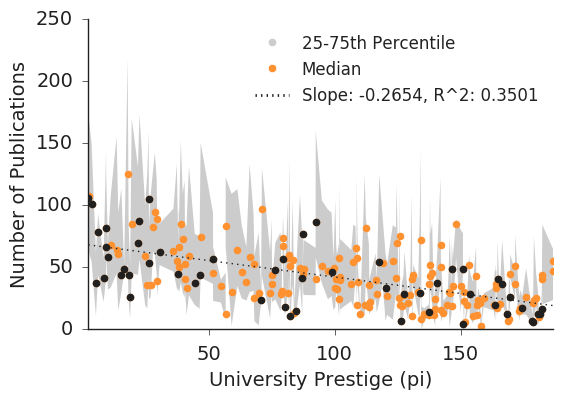

In [12]:
plot_pubs_versus_prestige(pubs_by_inst, 'Number of Publications', function=np.median, percentiles=True, fit=True, private=True)

# Fractional Author Contribution

In [7]:
# Fractional contribution of publications for all current assistant faculty of a university
frac_pubs_by_inst = {};
for (name, inst_data) in inst.items():
    if name in ignore:
        continue
    current_faculty = faculty_at_institution(name, asst_faculty)
    frac_n_pubs = []
    for person in current_faculty:
        start = person.first_asst_job_year
        if person.__contains__('dblp_pubs'):            
            frac_contribution = 0
            for pub in person.dblp_pubs:
                if 'year' in pub and pub['year'] >= start and pub['year'] < 2012 and pub['pub_type'] in ['inproceedings', 'article']:
                    frac_contribution += inflation_adjust(pub['year'])/float(len(pub['authors']))
            frac_n_pubs.append((person.facultyName, frac_contribution))
            
    if len(n_pubs) > 0:
        frac_pubs_by_inst[name] = frac_n_pubs

### Prestige

Line of best fit has a slope of -0.0955 and a r^2 of 0.3214


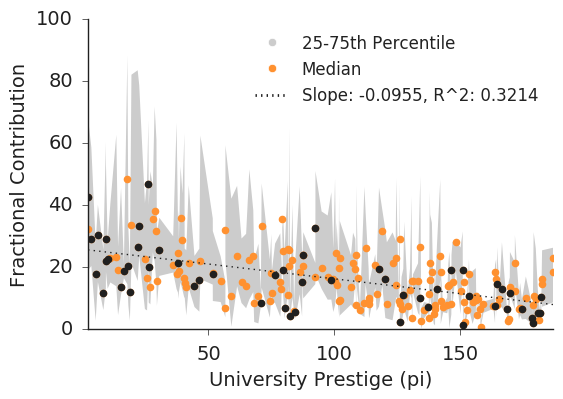

In [13]:
plot_pubs_versus_prestige(frac_pubs_by_inst, 'Fractional Contribution', function=np.median, percentiles=True, fit=True, private=True)

# Exclude Middle Author Role From Number of Publications

In [9]:
# Number of publications for all current assistant faculty of a university
first_and_last_pubs_by_inst = {}
for (name, inst_data) in inst.items():
    if name in ignore:
        continue
    current_faculty = faculty_at_institution(name, asst_faculty)
    n_pubs = []
    for person in current_faculty:
        start = person.first_asst_job_year
        if person.__contains__('dblp_pubs'):
            first_and_last_contributions = 0
            for pub in person.dblp_pubs:
                if 'year' in pub and pub['year'] >= start and pub['year'] < 2012 and pub['pub_type'] in ['inproceedings', 'article']:
                    if pub['author_role'] != 1:
                        first_and_last_contributions += inflation_adjust(pub['year'])
            n_pubs.append((person.facultyName, first_and_last_contributions))
    
    if len(n_pubs) > 0:
        first_and_last_pubs_by_inst[name] = n_pubs

### Prestige

Line of best fit has a slope of -0.1858 and a r^2 of 0.3344


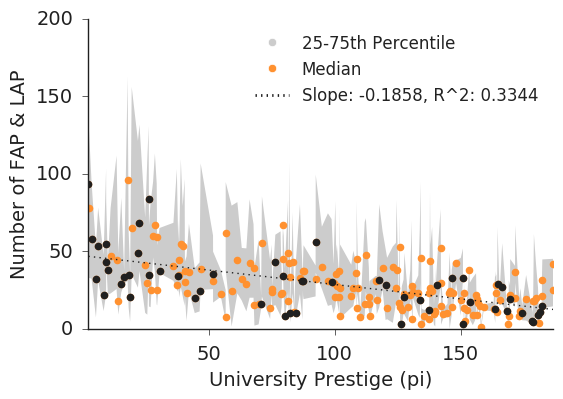

In [14]:
plot_pubs_versus_prestige(first_and_last_pubs_by_inst, 'Number of FAP & LAP', function=np.median, percentiles=True, fit=True, private=True)